In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy import io
import csv

In [22]:
# 난수 생성을 위한 seed 값 설정
np.random.seed(0)
# data 파일 읽기
input_csv=[]
f = open("data/2022-03-06-01_22_52 C2_02_DD_00_13_E9.csv", 'r', encoding='utf-8')
rdf = csv.reader(f)
for line in rdf:
    input_csv.append(int(line[0]))
f.close()

In [23]:
# 분석할 값만 배열로 저장
def get_rssi(i):
    """Measure sonar."""
    #z = input_mat['sonarAlt'][0][i]  # input_mat['sonaralt']: (1, 1501)
    z= input_csv[i]
    return z

In [24]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm."""
    """칼만필터 알고리즘 (매개변수: 측정값, 추정값, 오차공분산)"""
    
    # (1) Prediction.
    """x와 P의 계산
    Input: 직전추정값과 오차공분산
    OutputL 예측값 """
    x_pred = A @ x_esti
    P_pred = A @ P @ A.T + Q 

    # (2) Kalman Gain.
    """Kalman Gain 계산 
        P는 (1)에서 계산
        H와 R은 미리 설정된 값"""
    K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)

    # (3) Estimation.
    """입력된 측정값으로 추정값 계산
        X_pred는 (1)에서 계산"""
    x_esti = x_pred + K @ (z_meas - H @ x_pred)

    # (4) Error Covariance.
    """오차공분산 구하기
        앞에서 계산한 추정값을 사용할지 말지를 결정"""
    P = P_pred - K @ H @ P_pred

    #  추정값과 오차공분산
    return x_esti, P 

In [25]:
# Input parameters.
n_samples = len(input_csv) #Rssi 측정값 개수
time_end = len(input_csv) #시간 추후 수정 필요

In [26]:
# Initialization for system model.
# Matrix: A, H, Q, R, P_0
# Vector: x_0

dt = (time_end / n_samples)
"""시스템 모델: A, H, Q, R
    칼만필터를 사용하는 목적에 따라 사용자가 정함"""
A = np.array([[1, dt],
              [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[1, 0],
              [0, 3]])
R = np.array([[10]])


In [27]:
# 초깃값 설정 및 선언
x_0 = np.array([-65, 5])  # position and velocity
P_0 = 5 * np.eye(2)
time = np.arange(0, time_end, dt)
z_rssi_meas_save = np.zeros(n_samples)
x_rssi_esti_save = np.zeros(n_samples)
x_esti, P = None, None

In [28]:
# Kalman Filter 수행 
for i in range(n_samples):
    z_meas = get_rssi(i) # z_meas: 측정값
    # (0) Initialization for estimation.
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    z_rssi_meas_save[i] = z_meas
    x_rssi_esti_save[i] = x_esti[0]

In [29]:
# 난수 생성을 위한 seed 값 설정
np.random.seed(0)
# data 파일 읽기
noiseless_csv=[]
f = open("data/2022-03-04-05_19_30 C2_02_DD_00_13_E9.csv", 'r', encoding='utf-8')
rdf = csv.reader(f)
for line in rdf:
    noiseless_csv.append(int(line[0]))
f.close()

noiseless =noiseless_csv[0:n_samples]

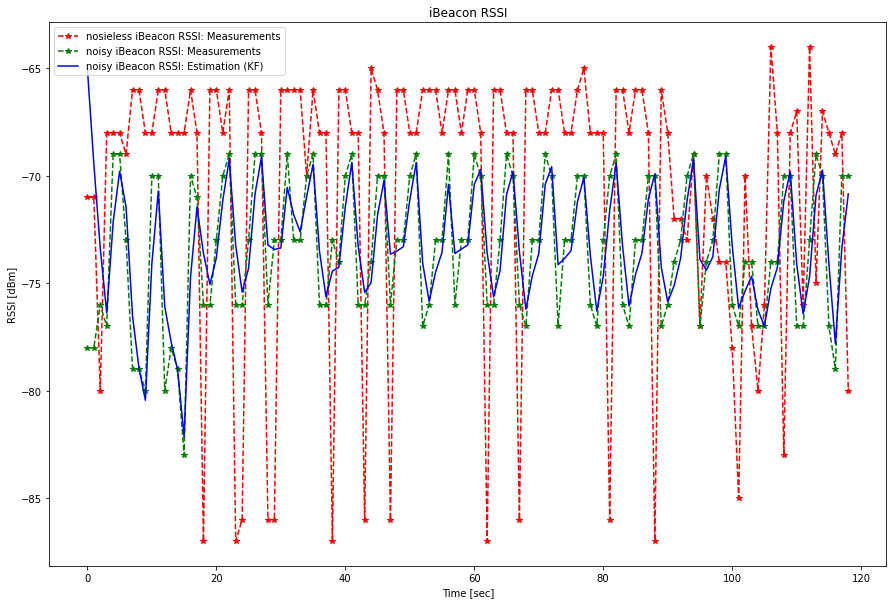

In [33]:
# 위치 측정 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 10))
plt.plot(time, noiseless, 'r*--', label='nosieless iBeacon RSSI: Measurements')
plt.plot(time, z_rssi_meas_save, 'g*--', label='noisy iBeacon RSSI: Measurements')
plt.plot(time, x_rssi_esti_save, 'b-', label='noisy iBeacon RSSI: Estimation (KF)')
plt.legend(loc='upper left')
plt.title('iBeacon RSSI')
plt.xlabel('Time [sec]')
plt.ylabel('RSSI [dBm]')
plt.savefig('iBeacon RSSI_kf_1m.png') # 그래프 저장

In [31]:
print("시나리오 1")
print("평균: ", np.average(noiseless), "최솟값:", np.min(noiseless), "최댓값: ", np.max(noiseless))
print("시나리오 2")
print("평균: ", np.average(z_rssi_meas_save), "최솟값: ", np.min(z_rssi_meas_save), "최댓값: ", np.max(z_rssi_meas_save))
print("시나리오 3")
print("평균: ", np.average(x_rssi_esti_save), "최솟값: ", np.min(x_rssi_esti_save), "최댓값: ", np.max(x_rssi_esti_save))

시나리오 1
평균:  -70.43697478991596 최솟값: -87 최댓값:  -64
시나리오 2
평균:  -73.36974789915966 최솟값:  -83.0 최댓값:  -69.0
시나리오 3
평균:  -73.1951955937855 최솟값:  -82.13781251383868 최댓값:  -65.0


In [20]:
n_samples

119